In [1]:
import os
import toml
import torch
import numpy as np
import pandas as pd
import albumentations as albu
from albumentations.pytorch import ToTensorV2
from torch.utils.data import DataLoader
from src.data_utils import CellDataset
from src.transfroms import Normalize
from src.model import ResUNet
from src.utils import load_model, plot_samples

In [2]:
cfg = toml.load("./config/cfg.toml")
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


In [3]:
WEIGHTS = os.listdir('./weights')
WEIGHTS = [f'./weights/{wghts}' for wghts in WEIGHTS]


In [4]:
model = ResUNet(cfg['model'])
model = load_model(WEIGHTS[1], model, device)

In [5]:
val_transforms = albu.Compose([Normalize(), ToTensorV2()])


In [6]:
IMG_FOLDER = "./data/train"
train_df = pd.read_csv("./data/train.csv")
val_ids = np.load("./data/data_split/val_idxs.npy", allow_pickle=True)
val_dataset = CellDataset(IMG_FOLDER, train_df, val_ids, val_transforms)
dataloader_val = DataLoader(val_dataset, batch_size=1, shuffle=True)
print(len(dataloader_val))


61


# Inference:

In [7]:
val_it = iter(dataloader_val)

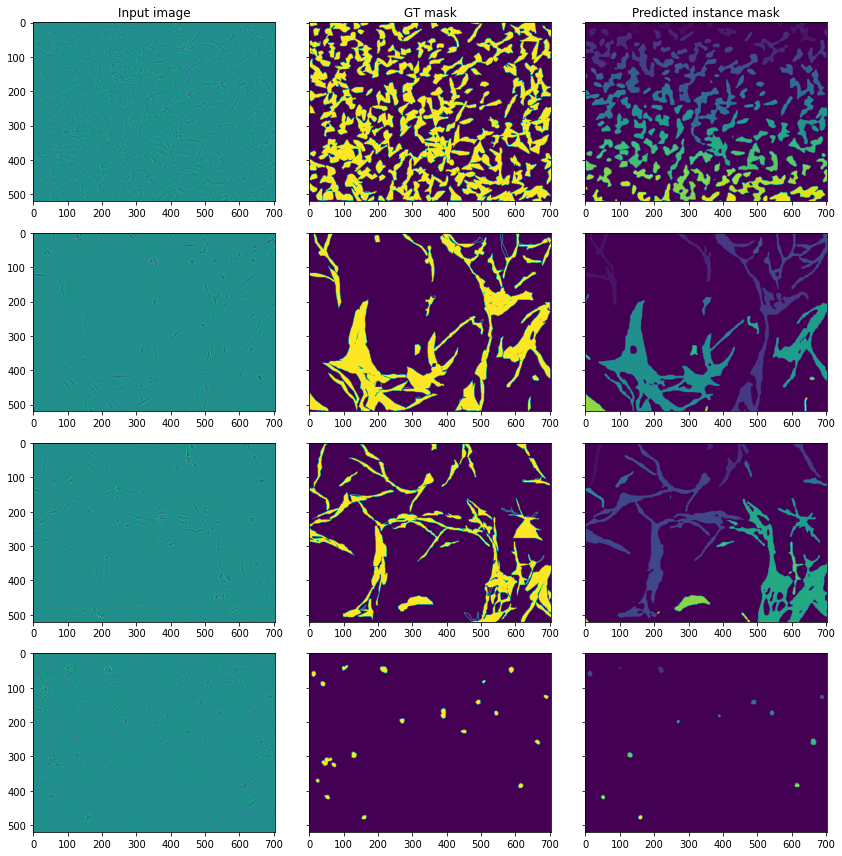

In [9]:
plot_samples(model, val_it)